In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table as Tb
%matplotlib notebook

In [2]:
from scipy import stats
import numpy as np

In [3]:
df = pd.read_excel("0802_1000Microns_TwoSensors_3rd_Msmnt.xlsx")
df

,Cap. Bridge (bit),Voltage steps,V(PZT),V(PZT).1,Voltage diff.,real_V,CH1 M-E Sensor,CH1 ME_D,CH1 ME_A_dis,CH2 M-E Sensor,CH2 ME_D,CH2 ME_A_dis,Fringes,Fringe_D,fringe_A_dis,Time
0,NaN,NaN,(before code)(monitor),(after code)(monitor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29324.0,NaN,0,0.376,0.376,3.76,1358.55,NaN,NaN,1317.24,NaN,NaN,NaN,NaN,NaN,09:46:00
2,29724.0,400.0,0.392,1.467,1.075,14.67,1365.17,6.62,6.62,1323.72,6.48,6.48,22.0,6.9608,6.9608,09:49:00
3,30124.0,400.0,1.433,2.258,0.825,22.58,1371.71,6.54,13.16,1330.08,6.36,12.84,24.0,7.5936,14.5544,09:51:00
4,30524.0,400.0,2.217,3.012,0.795,30.12,1378.31,6.60,19.76,1336.52,6.44,19.28,22.0,6.9608,21.5152,09:52:00
5,30924.0,400.0,2.982,3.749,0.767,37.49,1385.00,6.69,26.45,1343.03,6.51,25.79,21.0,6.6444,28.1596,09:54:00
6,31324.0,400.0,3.694,4.46,0.766,44.60,1391.69,6.69,33.14,1349.54,6.51,32.30,21.0,6.6444,34.8040,09:55:00
7,31724.0,400.0,4.4,5.16,0.760,51.60,1398.41,6.72,39.86,1356.08,6.54,38.84,20.0,6.3280,41.1320,09:57:00
8,32124.0,400.0,5.1,5.87,0.770,58.70,1405.15,6.74,46.60,1362.64,6.56,45.40,20.0,6.3280,47.4600,09:58:00
9,32524.0,400.0,5.81,6.57,0.760,65.70,1411.94,6.79,53.39,1369.25,6.61,52.01,21.0,6.6444,54.1044,10:00:00


In [4]:
#column of sensor 1 (channel 1)
ME_A_dis_CH1 = df["CH1 ME_A_dis"][2:27]
print(ME_A_dis_CH1)

2      6.62
3     13.16
4     19.76
5     26.45
6     33.14
7     39.86
8     46.60
9     53.39
10    60.04
11    67.99
12    75.95
13    67.98
14    60.02
15    53.38
16    46.59
17    39.84
18    33.14
19    26.48
20    19.82
21    13.22
22     6.69
23     0.19
24    -6.25
25   -12.86
26   -20.08
Name: CH1 ME_A_dis, dtype: float64


In [5]:
#column of sensor 2 (channel 2)
ME_A_dis_CH2 = df["CH2 ME_A_dis"][2:27]
print(ME_A_dis_CH2)

2      6.48
3     12.84
4     19.28
5     25.79
6     32.30
7     38.84
8     45.40
9     52.01
10    58.48
11    66.22
12    73.97
13    66.25
14    58.51
15    52.07
16    45.49
17    38.94
18    32.43
19    25.96
20    19.50
21    13.09
22     6.75
23     0.44
24    -5.81
25   -12.22
26   -19.23
Name: CH2 ME_A_dis, dtype: float64


In [6]:
x = ME_A_dis_CH2
y = ME_A_dis_CH1

info_Sensors = stats.linregress(x,y)
info_Sensors

LinregressResult(slope=1.030025983882961, intercept=-0.2117194452518767, rvalue=0.9999964491098432, pvalue=1.01641899913363e-60, stderr=0.0005723596850031518, intercept_stderr=0.022555208163634904)

<IPython.core.display.Javascript object>


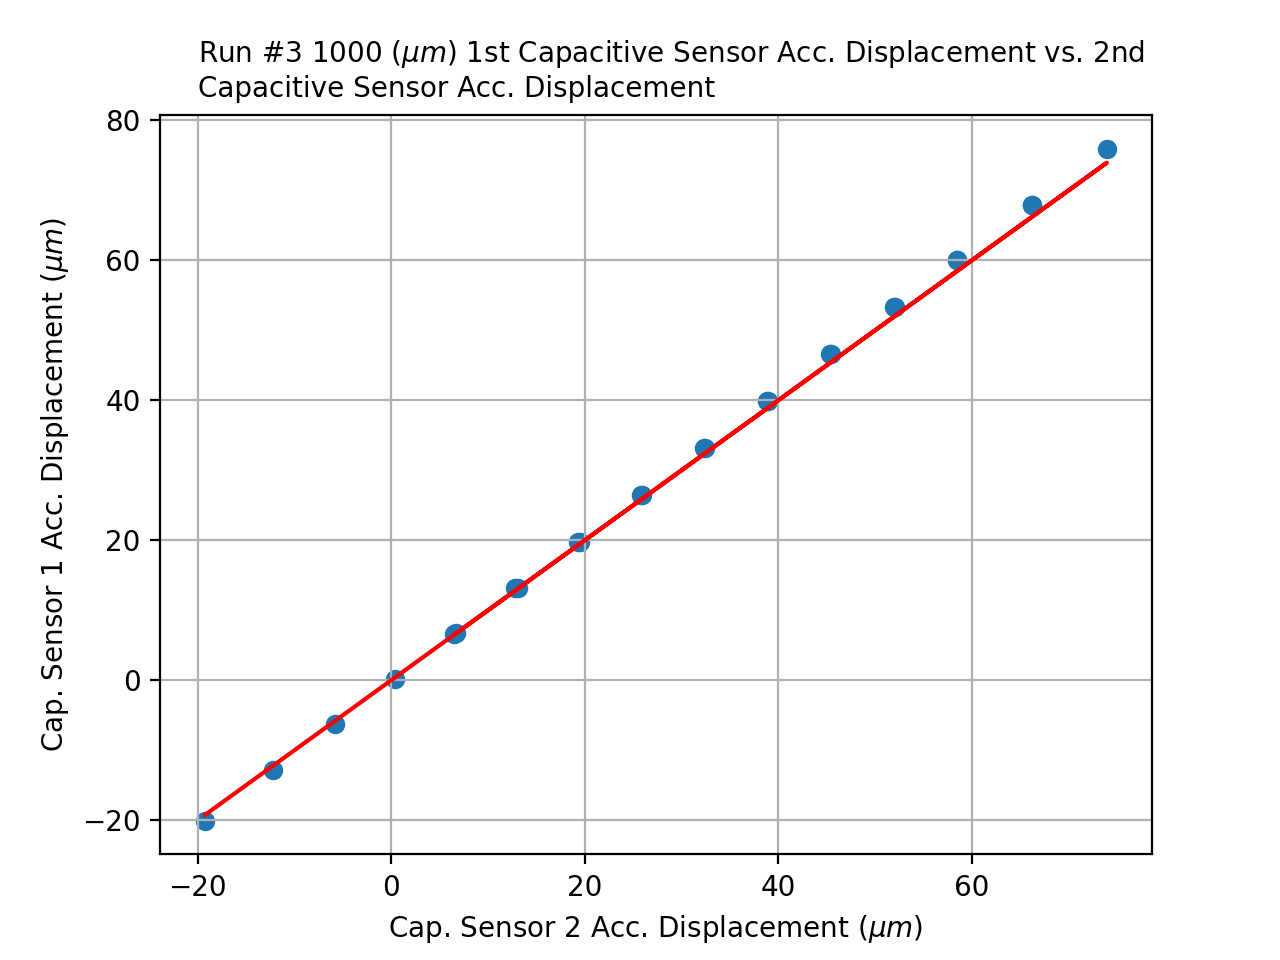

In [7]:
#plot of first sensor vs. second sensor
plt.close("all")

#plot of our reference data, channel 2
plt.plot(x,x,c = "red")


plt.scatter(x,y)


plt.xlabel('Cap. Sensor 2 Acc. Displacement ($\mu m$)')
plt.ylabel('Cap. Sensor 1 Acc. Displacement ($\mu m$)')
t = 'Run #3 1000 ($\mu m$) 1st Capacitive Sensor Acc. Displacement vs. 2nd Capacitive Sensor Acc. Displacement'
plt.text(-20, 84, t, ha='left', rotation=0, wrap=True)


plt.grid()
plt.show

plt.savefig('Run 3 1000 Microns Two Sensors.svg')